In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

pd.set_option('display.min_rows', 10)
pd.set_option('display.max_rows', 10)

In [11]:
current_path = os.path.abspath("")
directory = os.path.dirname(current_path)
results_directory = rf"{directory}\bormhub_results"
bike_results_path = rf"{directory}\Notes\Fitness\Exercise bike cardio log.md"
bike_df = pd.read_csv(bike_results_path, sep="      ", header=None)

C:\Users\s4680974\AppData\Local\Temp\ipykernel_3996\312279472.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  bike_df = pd.read_csv(bike_results_path, sep="      ", header=None)


In [12]:
time_dict = {}
speed_dict = {}
hr_dict = {}
res_dict = {}

date_c = "nah"

date_flag = "### "
time_flag = "min"
speed_flag = "kph"
hr_flag = "bpm"
res_flag = "R"

for idx, row in bike_df.iterrows():
    info:str = row[0]

    if info.startswith(date_flag):
        date_c = pd.to_datetime(info[len(date_flag):])

    elif time_flag in info:
        time_dict[date_c] = int(info.strip(time_flag))

    elif speed_flag in info:
        speed_dict[date_c] = float(info.strip(speed_flag))

    elif hr_flag in info:
        hr_dict[date_c] = int(info.strip(hr_flag))

    elif res_flag in info:
        res_dict[date_c] = int(info.strip(res_flag))

results = pd.DataFrame([time_dict,speed_dict,hr_dict,res_dict]).T
results.columns = ['Time','Speed','Heart rate','Resistance']
results

,Time,Speed,Heart rate,Resistance
2024-11-19,45.0,27.7,122.0,8.0
2024-08-15,30.0,30.2,151.0,9.0
2024-08-03,20.0,30.0,137.0,10.0
2024-07-09,30.0,30.2,139.0,9.0
2024-07-06,30.0,30.5,154.0,9.0
...,...,...,...,...
2024-05-18,30.0,28.6,148.0,7.0
2024-05-04,30.0,30.2,152.0,7.0
2024-04-30,30.0,29.6,145.0,8.0
2024-04-27,30.0,29.1,130.0,7.0


In [13]:
# save results to csv so it can be loaded by lifting notebook
results.to_csv(rf'{results_directory}\exercise-bike.csv')

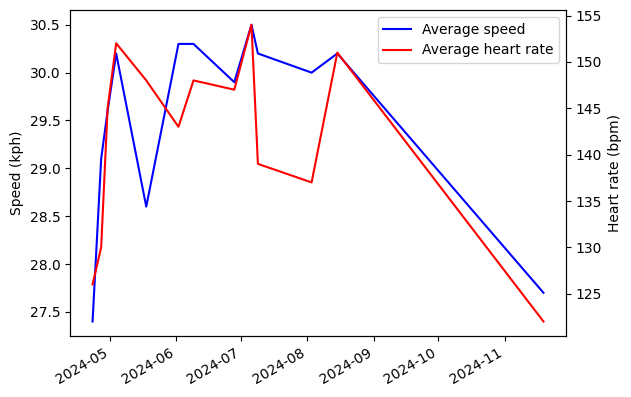

In [14]:
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html
fig, ax1 = plt.subplots()

line1 = ax1.plot(results.index,results['Speed'],'b',label = 'Average speed')
ax1.set_ylabel('Speed (kph)')
ax2 = ax1.twinx()
line2 = ax2.plot(results.index,results['Heart rate'],'r',label = 'Average heart rate')
ax2.set_ylabel('Heart rate (bpm)')

lines = line1 + line2
labs = [l.get_label() for l in lines]
ax1.legend(lines, labs, loc=0)

plt.gcf().autofmt_xdate()
plt.savefig(rf"{results_directory}\figures\exercise_bike.png", dpi=300, bbox_inches='tight')